# Colun or semicolun ?

In this notebook, we are going to implement a logistic regression algrorithm.
- 1st, we'll build a dataset
- 2nd, we'll you are going do define a model
- 3rd, we'll build a backpropagation method
- 4th, we'll build a gradient descent method


---
### Dataset

We build a dataset to illustrate our purpose.

The dataset we build is supposed to help us converting a paper scan into a ASCII string. Lets imagine that, when a paper is scaned, we can detect, with high confidence that we are over a colun or a semicolun. Our objective here is to detect wether it's one or the other.

Therefore, our algorithm is fed with a vector $x_i \in [0,1]^5$ which represent the intensity of the pen stroke writting on the paper.

Here below, you have an example of 'perfect' strokes for $x_1$ an example of colun, and $x_2$ an example of semicolun. 

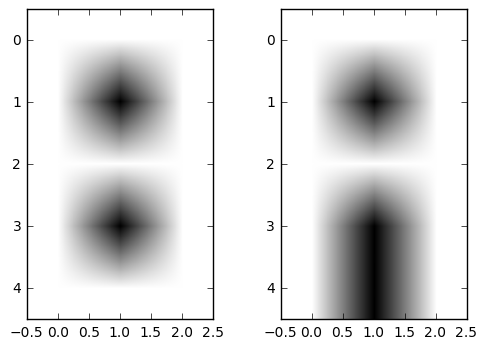

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_1 = np.array([0,1,0,1,0])
x_2 = np.array([0,1,0,1,1])

def to_img(vec):
    matrix = np.ones((5, 3))
    matrix[:, 1] = 1-vec
    return matrix

fig, axs = plt.subplots(1,2)
axs[0].imshow(to_img(x_1), cmap='gray')
axs[1].imshow(to_img(x_2), cmap='gray')
plt.show()

Whenever a sample $x_i$ belongs to the class *colun*, we'll label it with $y_i=0$.  
Likewise, whenever a sample $x_i$ belongs to the class *semicolun*, we'll label it with $y_i=1$.  

In [2]:
y_1 = 0
y_2 = 1

### Dataset generation

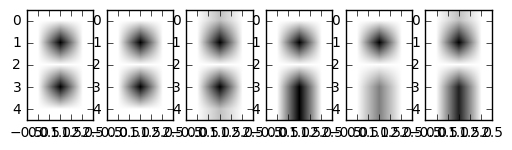

In [3]:
X = np.array([
    [.0, 1., 0., 1., 0.],
    [.0, .9, 0., .9, 0.],
    [.2, .8, 0., .8, .2],
    [.0, 1., 0., 1., 1.],
    [.0, 1., 0., .5, .5],
    [.2, .8, 0., .7, .7]])
y = np.array([0,0,0,1,1,1])

fig, axs = plt.subplots(1,6)
for i in range(len(X)):
    axs[i].imshow(to_img(X[i]), cmap='gray')
plt.show()

---
### Defining a logistic regression model

(Ressource: http://cs229.stanford.edu/notes/cs229-notes1.pdf).

You're going to build a model which outputs a prediction value $p_i$ given an input $x_i$. This prediction $p_i$ will reflect the propability that your input $x_i$ belongs to class 1.
$$
\begin{align}
p_i &= P(Y=1 | W, x_i) \\
p(x_i,W) &= P(Y=1 | W, x_i)
\end{align}
$$

As $p_i$ is a probability, it must be in [0,1].

The model we'll consider perform a weighted sum of its input:
- Weighted sum : $ s = (W^t \cdot X + b) $

And then squizes the values between 0 and 1 (which is our prediction value):
- prediction : $ p(s) = \frac{1}{1 + e^{-s}} $

In [4]:
#Here we only conpute the p
import math 
nbElem=6
size=5
b=1
alpha=0.01
np.random.seed(1)
s=np.zeros((1,nbElem))
p=np.zeros((1,nbElem))
W=np.random.random((1,size))

def sigmoid(x):
    return (1/(1+math.exp(-x)))

for i in range(0,nbElem):
    s[0,i]=np.matmul(W,np.transpose(X[i]))+b
    p[0,i]=sigmoid(s[0,i]) 
print("P= ",p) 




P=  [[ 0.88315548  0.87218207  0.87334693  0.89746896  0.87488605  0.87804288]]


---
### Comparison of these predicted values ($p_i$) with the true output ($y_i$)

Overall, we would like to maximize the likelihood that we are right at predicting a label.  

$$
\begin{align}
\max \text{likelihood} &= \text{argmax}_w \Pi_i P(Y | W, x_i) \\
&= \text{argmax}_w \Pi_i \big( P(Y=y_i | W, x_i) \big) \\
&= \text{argmax}_w \Pi_i \big( P(Y=1 | W, x_i)^{y_i} \cdot P(Y=0 | W, x_i)^{1-y_i} \big) \\
&= \text{argmax}_w \Pi_i \big( P(Y=1 | W, x_i)^{y_i} \cdot 1-P(Y=1 | W, x_i)^{1-y_i}\big) \\
&= \text{argmax}_w \Pi_i \big( p_i^{y_i} \cdot 1-p_i^{1-y_i}\big) \\
&= \text{argmax}_w \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
&= \text{argmin}_w - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
\end{align}
$$
And this term is going to be our **loss** that we want to reduce:
$$
L(x_i, W, y_i) = - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big)
$$
This is how you compare the prediction you made ($p_i$) to the true output you expected ($y_i$).

#### In our example :
In means of colun and semicolun : remember $x_0$, it's a colun, therefore it's label is $y_0=0$.  
If your classifier is good you'ld expect it to predict it's a semicolun, hense have $p_i = $*"Something small like 0.1"*. 

The error for this one sample is going to be:
$$
\begin{align}
L(X, W, y) &= - \sum_i \big( y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \big) \\
&= y_0 \ln(p_0) + (1-y_0) \ln(1-p_0) \\
&= - 0 \ln(.9) + (1-0) \ln(1-.9) \\
&= - \ln(.1)
\end{align}
$$

### Minimisation of the Loss function

To reduce the error, we have to find the minimum of $L(x, W, y)$.  
Hense, we derive it with respect to $W$ and find the 'zeros'.

In [5]:
#Here we compute the p and the derivative of w
import math 
nbElem=6
b=1
line=6
alpha=0.01
np.random.seed(1)
dlw=np.zeros((1,size))
s=np.zeros((1,nbElem))
p=np.zeros((1,nbElem))
W=np.random.random((1,size))

def sigmoid(x):
    return (1/(1+math.exp(-x)))

for i in range(0,nbElem):
    s[0,i]=np.matmul(W,np.transpose(X[i]))+b
    p[0,i]=sigmoid(s[0,i]) 
for j in range(0,size):            
    dlw[0,j]=(1/size)*sum((p[0,j]-y[j])*X[j])
print("P= ",p) 
print("dlw= ",dlw)


P=  [[ 0.88315548  0.87218207  0.87334693  0.89746896  0.87488605  0.87804288]]
dlw=  [[ 0.35326219  0.31398554  0.34933877 -0.06151862 -0.05004558]]


### Stochastic gradient descent application  to solve this

We are going to solve this with Stochastic Gradient Descent (SGD), meaning that we start with some values for $W$ and update this values such that our loss value disminushes.
$$
W = W + \alpha \frac{\delta L(x, W, y)}{\delta W}
$$

In [6]:

import math 
size=5
nbElem=6
b=1
alpha=0.001
np.random.seed(1)
W=np.random.random((1,size))
dlw=np.zeros((1,size))
s=np.zeros((1,nbElem))
p=np.zeros((1,nbElem))
print("W randomly generated ",W)

def sigmoid(x):
    return (1/(1+math.exp(-x)))

for k in range(0,1000000):
    for i in range(0,nbElem):#We compute the probability of being from one class or another
        s[0,i]=np.matmul(W,np.transpose(X[i]))+b
        p[0,i]=sigmoid(s[0,i]) 
    loss = - y * np.log(p) - (1 - y) * np.log(1 - p)
    for j in range(0,size):#We update the parameters            
        dlw[0,j]=(1/size)*sum((p[0,j]-y[j])*X[j])
        W[0,j] = W[0,j] - alpha * dlw[0,j]
        
print("\n Iteration ",k+1)
print("P= ",p) 
print("W= ",W) 
print("dlw= ",dlw)
#####
print("Sum dlw= ",sum(dlw[0]))
print("Loss = ",loss)

######We can see that with 1000000 iterations we obtain :
#P=  [[ 0.00151079  0.00319093  0.1287026   0.99999998  0.98900888  0.99995589]]
#W=  [[ -8.94452989  -9.86372897 -63.34451237   2.37011962  24.35657117]]
#dlw=  [[  6.04317481e-04   1.14873418e-03   5.14810394e-02  -1.04801356e-08
 #  -4.39644913e-03]]
#Loss =  [[  1.51193610e-03   3.19603014e-03   1.37771912e-01   1.74668929e-08
 #   1.10519715e-02   4.41104246e-05]]


W randomly generated  [[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
    1.46755891e-01]]

 Iteration  1000000
P=  [[ 0.00151079  0.00319093  0.1287026   0.99999998  0.98900888  0.99995589]]
W=  [[ -8.94452989  -9.86372897 -63.34451237   2.37011962  24.35657117]]
dlw=  [[  6.04317481e-04   1.14873418e-03   5.14810394e-02  -1.04801356e-08
   -4.39644913e-03]]
Sum dlw=  0.0488376314631
Loss =  [[  1.51193610e-03   3.19603014e-03   1.37771912e-01   1.74668929e-08
    1.10519715e-02   4.41104246e-05]]
